## Regularization: Penalized Regression
Regularization force the learning algorithm to build a less complex model. In practice, that often leads to slightly higher bias but significantly reduces the variance. The most common penalized regression models are:
1. Ridgre Regression
2. Lasso Regression
3. Elastic Net Regression
In this notebook we will explore the three methods and compare their results with a multiple linear regression model applied to our synthetic data generated from the following true model f(x)
    - y = f(x) = x + 2x^2 - 3x^3 + E
The target variable is y and the features are 5 polynomial features of X. Namely, X1 = X, X2 = X^2, X3 = X^3 and etc.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set() 
import warnings
warnings.filterwarnings("ignore")

In [27]:
rand_state = 1000

In [11]:
df = pd.read_csv("Regularization_synthetic.csv")

In [13]:
df.head()

,X1,X2,X3,X4,X5,y
0,1.668068,2.782452,4.641320,7.742038,12.914249,-3.901562
1,0.925862,0.857220,0.793667,0.734826,0.680348,-0.384578
2,1.057997,1.119357,1.184276,1.252960,1.325628,12.493677
3,-0.920339,0.847024,-0.779549,0.717449,-0.660297,12.237389
4,1.299748,1.689346,2.195725,2.853890,3.709339,-3.772851


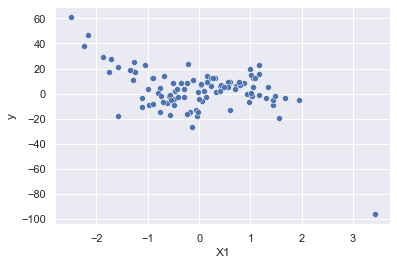

In [15]:
sns.scatterplot(x="X1", y = "y", data=df);

### Normalize The Features

In [16]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
df_sc = scaler.fit_transform(df)
df_sc[0]

array([ 1.68559489,  1.10379599,  0.93969261,  0.28529469,  0.20893775,
       -0.41160092])

In [19]:
df.describe()

,X1,X2,X3,X4,X5,y
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,100.000000
mean,-0.045528,1.035573,0.028803,3.577067e+00,2.649662e+00,3.163589
std,1.021734,1.590583,4.933266,1.467239e+01,4.937498e+01,17.251525
min,-2.502813,0.000077,-15.677801,5.990000e-09,-9.820688e+01,-96.615135
25%,-0.715772,0.106957,-0.367584,1.146202e-02,-1.894007e-01,-4.740569
50%,-0.056092,0.513483,-0.000186,2.639740e-01,-6.630000e-07,3.535766
75%,0.708103,1.265628,0.355353,1.605267e+00,1.785395e-01,12.250487
max,3.428563,11.755044,40.302907,1.381811e+02,4.737624e+02,61.375324


In [22]:
df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc.describe()

,X1,X2,X3,X4,X5,y
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,-3.219647e-17,1.088019e-16,3.191891e-18,-6.439294e-17,-1.568190e-17,1.165734e-17
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-2.417131e+00,-6.542960e-01,-3.199854e+00,-2.450240e-01,-2.052955e+00,-5.812900e+00
25%,-6.592917e-01,-5.867625e-01,-8.075457e-02,-2.442389e-01,-5.778970e-02,-4.604797e-01
50%,-1.039141e-02,-3.298919e-01,-5.905921e-03,-2.269422e-01,-5.393443e-02,2.168222e-02
75%,7.413157e-01,1.453640e-01,6.652695e-02,-1.350655e-01,-5.030020e-02,5.293837e-01
max,3.417322e+00,6.773285e+00,8.204909e+00,9.220184e+00,9.589597e+00,3.391294e+00


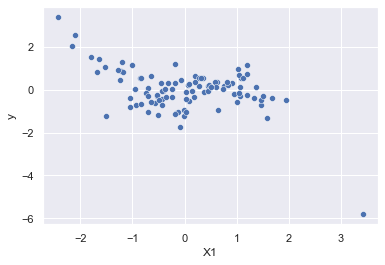

In [23]:
sns.scatterplot(x="X1", y = "y", data=df_sc);
# Standardization doesn't change the pattern but the scale is different.
# y is between -6 and 2.

### Splitting The Data

In [26]:
X = df_sc.drop(columns="y")
y = df_sc["y"]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)
X_train.head()

,X1,X2,X3,X4,X5
37,1.464631,0.662152,0.606819,0.052327,0.073610
44,1.572794,0.870372,0.757779,0.153824,0.130178
55,0.275319,-0.619639,-0.003245,-0.244817,-0.053920
66,-0.493702,-0.464986,-0.039290,-0.238872,-0.054935
82,0.272588,-0.620456,-0.003337,-0.244827,-0.053921


<AxesSubplot:>

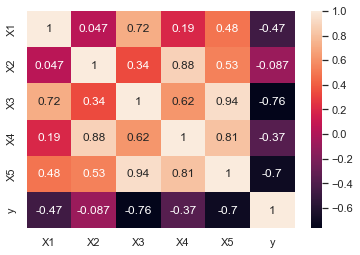

In [30]:
sns.heatmap(df_sc.corr(), annot=True)

In [31]:
# Let's run a linear regression (using statsmodel.api) and see the results as a benchmark.
X_test_wc = sm.add_constant(X_test)  # wc_: width constant
X_train_wc = sm.add_constant(X_train)

In [33]:
model = sm.OLS(y_train, X_train_wc).fit()              # OLS : Ordinary Least Squares
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     12.17
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           1.28e-08
Time:                        10:45:44   Log-Likelihood:                -65.981
No. Observations:                  80   AIC:                             144.0
Df Residuals:                      74   BIC:                             158.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0870      0.173      0.504      0.616      -0.257       0.431
X1             0.5370      0.199      2.705      0.008       0.141       0.933
X2             0.1037      0.302      0.343      0.732      -0.498       0.705
X3            -2.1339      0.839     -2.543      0.013      -3.806      -0.462
X4             0.2535      0.861      0.294      0.769      -1.463       1.970
X5             1.5933      1.669      0.954      0.343      -1.733       4.920
==============================================================================
Omnibus:                       11.757   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.171
Skew:                          -0.701   Prob(JB):                     0.000837
Kurtosis:                       4.512   Cond. No.                         33.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## A) Training The Models
In this section we will train 4 different models:
1. Linear Regression(model_linear)
2. Ridgre Regression(model_ridge)
3. Lasso Regression(model_lasso)
4. ElasticNet Regression(model_net)

In [34]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [35]:
model_linear = LinearRegression()
model_ridge = Ridge(alpha = 0) # if alpha(lambda) = 0 we can say that we will use linear regression.
model_lasso = Lasso(alpha = 0) # default alpha value = 0
model_net = ElasticNet(alpha = 0) # default l1_ratio = 0.5 and we won't change it now.

In [36]:
y_hat_linear = model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net = model_net.fit(X_train, y_train).predict(X_test)

In [39]:
df_predictions = pd.DataFrame({"y_test":y_test,
                               "y_hat_linear": y_hat_linear,
                               "y_hat_ridge": y_hat_ridge,
                               "y_hat_lasso": y_hat_lasso,
                               "y_hat_net": y_hat_net})
df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
88,1.307243,0.171067,0.171067,0.171067,0.171067
4,-0.404102,-0.079686,-0.079686,-0.079686,-0.079686
62,-1.055680,-0.180921,-0.180921,-0.180921,-0.180921
63,2.538916,2.344482,2.344482,2.344482,2.344482
48,1.144605,-0.078630,-0.078630,-0.078630,-0.078630


In [ ]:
# You can easily see that all of the hat values are equal. Because we used 0 as value for alpha.

### Coefficients

In [40]:
coefficients = pd.DataFrame({"Features": df.drop(columns="y").columns})
coefficients["model_lin"] = model_linear.coef_
coefficients["model_ridge"] = model_ridge.coef_
coefficients["model_lasso"] = model_lasso.coef_
coefficients["model_net"] = model_net.coef_
coefficients

,Features,model_lin,model_ridge,model_lasso,model_net
0,X1,0.537047,0.537047,0.537047,0.537047
1,X2,0.103655,0.103655,0.103655,0.103655
2,X3,-2.133872,-2.133872,-2.133872,-2.133872
3,X4,0.253492,0.253492,0.253492,0.253492
4,X5,1.593336,1.593336,1.593336,1.593336


### Performance in The Test Set

In [41]:
# RMSE for y_hat_linear
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_linear"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

2.037

In [43]:
# RMSE for y_hat_ridge
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_ridge"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

2.037

In [44]:
# RMSE for y_hat_lasso
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_lasso"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

2.037

In [45]:
# RMSE for y_hat_net
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_net"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

2.037

## Plotting The Regression Coefficients vs Alphas:
### 1) Ridge regression coefficients vs alpha

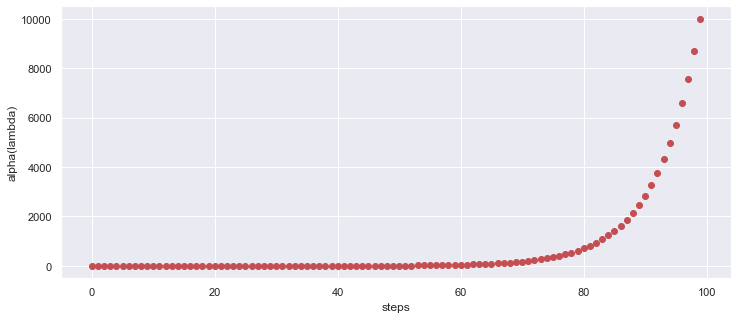

In [49]:
alpha_ridge = 10**np.linspace(-2, 4, 100)
plt.figure(figsize=(12, 5))
plt.plot(alpha_ridge, "or")
plt.xlabel("steps")
plt.ylabel("alpha(lambda)");

In [52]:
ridge = Ridge()
coefs_ridge = []

for i in alpha_ridge:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)

np.shape(coefs_ridge)

(100, 5)

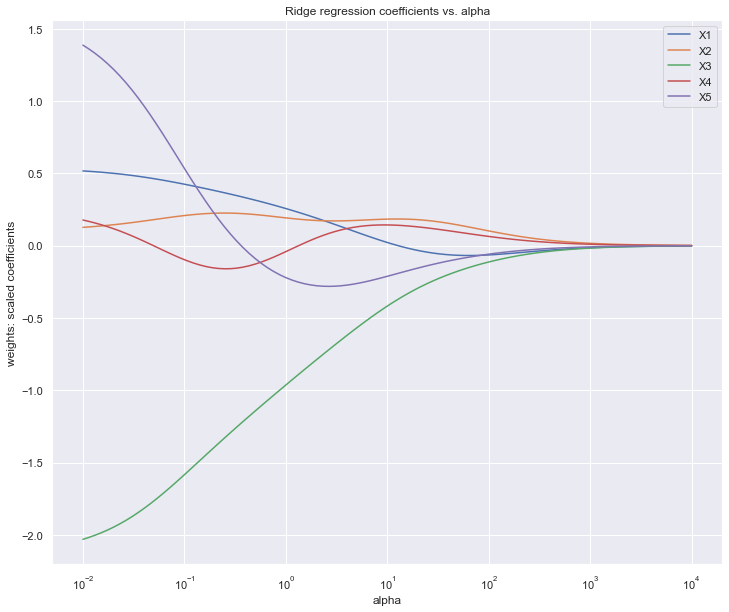

In [55]:
plt.figure(figsize=(12 ,10))
ax = plt.gca() # gca: Get the current axes
ax.plot(alpha_ridge, coefs_ridge)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("alpha")
plt.ylabel("weights: scaled coefficients")
plt.title("Ridge regression coefficients vs. alpha")
plt.legend(df.drop(columns="y").columns);

### 2) Lasso regression coefficients vs alpha

In [56]:
alpha_lasso = 10**np.linspace(-3, 1, 100)

In [58]:
lasso = Lasso()
coefs_lasso = []

for i in alpha_lasso:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)

np.shape(coefs_lasso)

(100, 5)

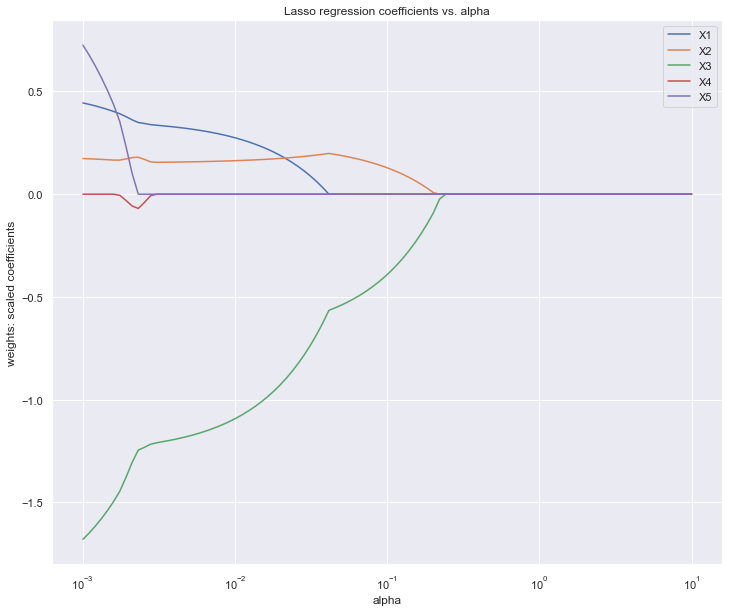

In [59]:
plt.figure(figsize = (12, 10))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("alpha")
plt.ylabel("weights: scaled coefficients")
plt.title("Lasso regression coefficients vs. alpha")
plt.legend(df.drop(columns="y").columns);

### Elastic Net regression coefficients vs alpha

In [60]:
alpha_elasticnet = 10**np.linspace(-3, 2, 100)

In [61]:
elasticnet = ElasticNet()
coefs_elasticnet = []

for i in alpha_elasticnet:
    elasticnet.set_params(alpha = i)
    elasticnet.fit(X_train, y_train)
    coefs_elasticnet.append(elasticnet.coef_)

np.shape(coefs_elasticnet)

(100, 5)

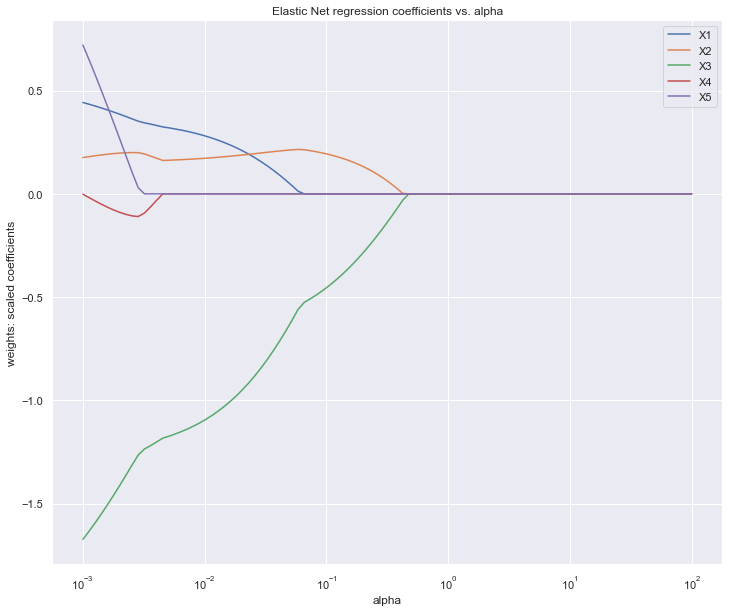

In [64]:
plt.figure(figsize = (12, 10))
ax = plt.gca()
ax.plot(alpha_elasticnet, coefs_elasticnet)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("alpha")
plt.ylabel("weights: scaled coefficients")
plt.title("Elastic Net regression coefficients vs. alpha")
plt.legend(df.drop(columns="y").columns);

## Cross Validation
Let's use cross validation to find the optimal Lambdas(alphas) for different models.<br>
Main usage of cross-validation is to tune the hyperparameters and then estimating the performance metrics in the test set.<br>
### 1) Optimal alpha for Ridge regression

In [65]:
ridgecv = RidgeCV() # default alphas=(0.1, 1.0, 10.0)--> If you want to be more precise you can pass a complete range here.
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

1.0

In [66]:
alpha_ridge_opt = ridgecv.alpha_
# alpha_ridge_opt = optimized ridge alpha value

### 2) Optimal alpha for Lasso regression

In [76]:
lassocv = LassoCV() # default alphas=None 
lassocv.fit(X_train, y_train)
lassocv.alpha_

0.004564470133023309

In [77]:
alpha_lasso_opt = lassocv.alpha_

### 3) Optimal alpha for Elastic Net regression

In [80]:
elasticnetcv = ElasticNetCV() # default alphas=None
elasticnetcv.fit(X_train, y_train)
elasticnetcv.alpha_

0.006440286888331817

In [82]:
elasticnetcv.l1_ratio_ # dfault l1_ratio = 0.5

0.5

In [83]:
alpha_elasticnet_opt = elasticnetcv.alpha_

## Refit the models!
#### Now go back and refit the 3 models with the optimal alphas!

In [104]:
model_linear = LinearRegression()
model_ridge = Ridge(alpha = alpha_ridge_opt)
model_lasso = Lasso(alpha = alpha_lasso_opt) 
model_net = ElasticNet(alpha = alpha_elasticnet_opt)

In [105]:
y_hat_linear = model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net = model_net.fit(X_train, y_train).predict(X_test)

In [106]:
df_predictions = pd.DataFrame({"y_test":y_test,
                               "y_hat_linear": y_hat_linear,
                               "y_hat_ridge": y_hat_ridge,
                               "y_hat_lasso": y_hat_lasso,
                               "y_hat_net": y_hat_net})
df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
88,1.307243,0.171067,0.175576,0.154862,0.163279
4,-0.404102,-0.079686,-0.032038,-0.047122,-0.044388
62,-1.055680,-0.180921,-0.148966,-0.148200,-0.149537
63,2.538916,2.344482,2.083804,2.156366,2.139361
48,1.144605,-0.078630,-0.001604,-0.031199,-0.022572


In [107]:
coefficients = pd.DataFrame({"Features": df.drop(columns="y").columns})
coefficients["model_lin"] = model_linear.coef_
coefficients["model_ridge"] = model_ridge.coef_
coefficients["model_lasso"] = model_lasso.coef_
coefficients["model_net"] = model_net.coef_
coefficients

,Features,model_lin,model_ridge,model_lasso,model_net
0,X1,0.537047,0.256687,0.322054,0.308461
1,X2,0.103655,0.192091,0.156880,0.165614
2,X3,-2.133872,-0.963844,-1.183806,-1.151128
3,X4,0.253492,-0.041360,-0.000000,-0.000000
4,X5,1.593336,-0.221195,0.000000,-0.000000


In [108]:
# RMSE for y_hat_linear
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_linear"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

2.037

In [109]:
# RMSE for y_hat_ridge
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_ridge"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

0.894

In [110]:
# RMSE for y_hat_lasso
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_lasso"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

0.81

In [111]:
# RMSE for y_hat_net
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_net"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

# Elasticnet has lowest RMSE score, sco ElasticNet is the best model for our data.

0.781